In [1]:
#import libraries
import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.metrics import confusion_matrix,classification_report
from collections import Counter
from wordcloud import WordCloud

import nltk
nltk.download('stopwords')
nltk.download('punkt')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer

#classifier
from sklearn.model_selection import train_test_split

from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import classification_report, accuracy_score

import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer

# Ensure the necessary NLTK data packages are downloaded
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /usr/share/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /usr/share/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

# Load data (already done)
data = pd.read_csv('/kaggle/input/ba-task-dataset/Resume/Resume.csv')


# **Data Visualization and Pre processing**

Text Length Analysis


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


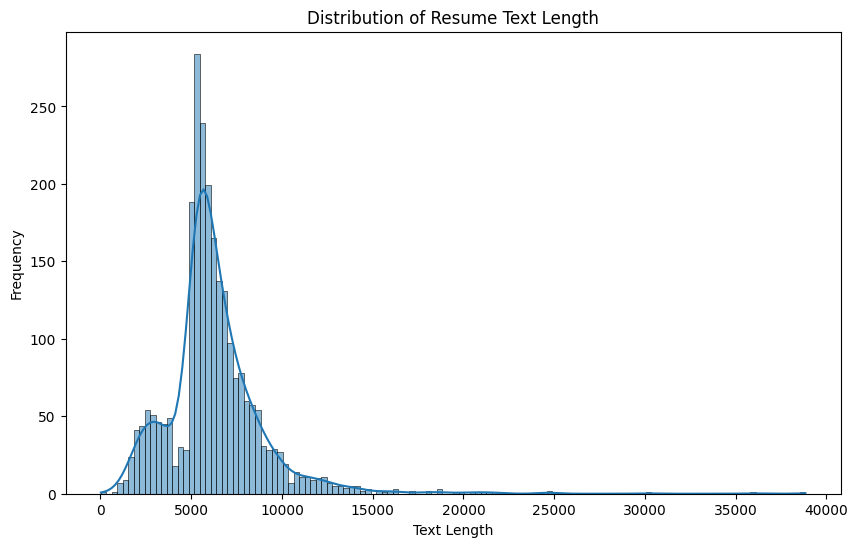

In [3]:
# Calculate text length for Resume_str
data['Text_Length'] = data['Resume_str'].apply(len)

# Plot the distribution of text length
plt.figure(figsize=(10, 6))
sns.histplot(data['Text_Length'], kde=True)
plt.title('Distribution of Resume Text Length')
plt.xlabel('Text Length')
plt.ylabel('Frequency')
plt.show()


 Category Distribution

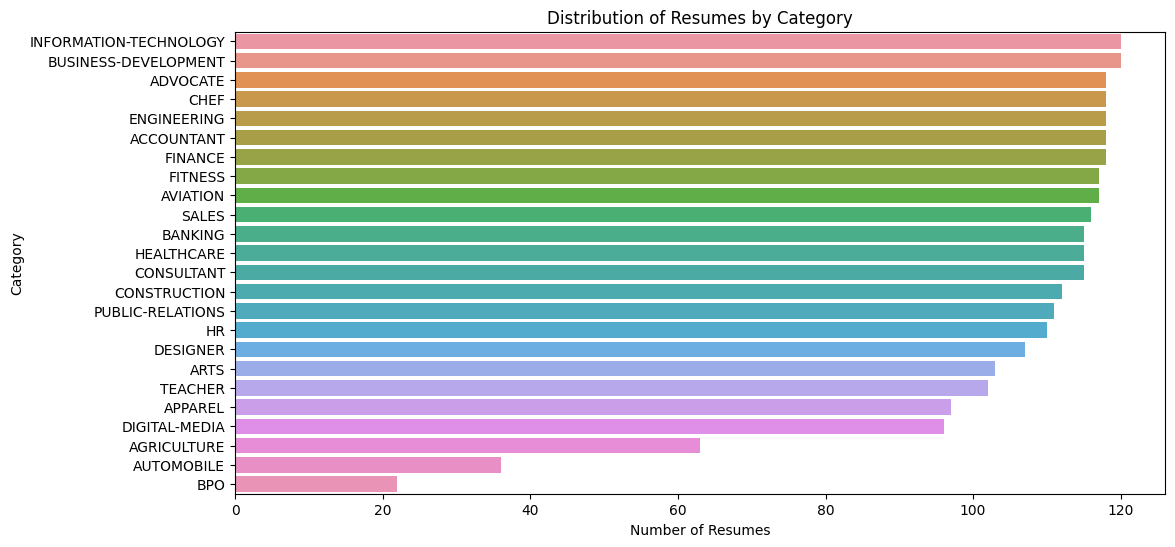

In [4]:
# Plot the distribution of categories
plt.figure(figsize=(12, 6))
sns.countplot(y=data['Category'], order = data['Category'].value_counts().index)
plt.title('Distribution of Resumes by Category')
plt.xlabel('Number of Resumes')
plt.ylabel('Category')
plt.show()


Word Cloud Visualization for Each Category

In [5]:

# categories = data['Category'].unique()

# for category in categories:
#     plt.figure(figsize=(8, 8))
#     text = ' '.join(data[data['Category'] == category]['Resume_str'])
#     wordcloud = WordCloud(width=800, height=800, background_color='white').generate(text)
#     plt.imshow(wordcloud, interpolation='bilinear')
#     plt.title(f'Word Cloud for {category} Category')
#     plt.axis('off')
#     plt.show()


In [6]:
import pandas as pd

# Drop rows where 'Resume_str' or 'Category' are missing
data_cleaned = data.dropna(subset=['Resume_str', 'Category'])

# Add a new column for text length
data_cleaned['Text_Length'] = data_cleaned['Resume_str'].apply(len)

# Save the cleaned data to a new CSV file



In [7]:
data_cleaned

,ID,Resume_str,Resume_html,Category,Text_Length
0,16852973,HR ADMINISTRATOR/MARKETING ASSOCIATE\...,"<div class=""fontsize fontface vmargins hmargin...",HR,5442
1,22323967,"HR SPECIALIST, US HR OPERATIONS ...","<div class=""fontsize fontface vmargins hmargin...",HR,5572
2,33176873,HR DIRECTOR Summary Over 2...,"<div class=""fontsize fontface vmargins hmargin...",HR,7720
3,27018550,HR SPECIALIST Summary Dedica...,"<div class=""fontsize fontface vmargins hmargin...",HR,2855
4,17812897,HR MANAGER Skill Highlights ...,"<div class=""fontsize fontface vmargins hmargin...",HR,9172
...,...,...,...,...,...
2479,99416532,RANK: SGT/E-5 NON- COMMISSIONED OFFIC...,"<div class=""fontsize fontface vmargins hmargin...",AVIATION,5533
2480,24589765,"GOVERNMENT RELATIONS, COMMUNICATIONS ...","<div class=""fontsize fontface vmargins hmargin...",AVIATION,7108
2481,31605080,GEEK SQUAD AGENT Professional...,"<div class=""fontsize fontface vmargins hmargin...",AVIATION,2020
2482,21190805,PROGRAM DIRECTOR / OFFICE MANAGER ...,"<div class=""fontsize fontface vmargins hmargin...",AVIATION,5074


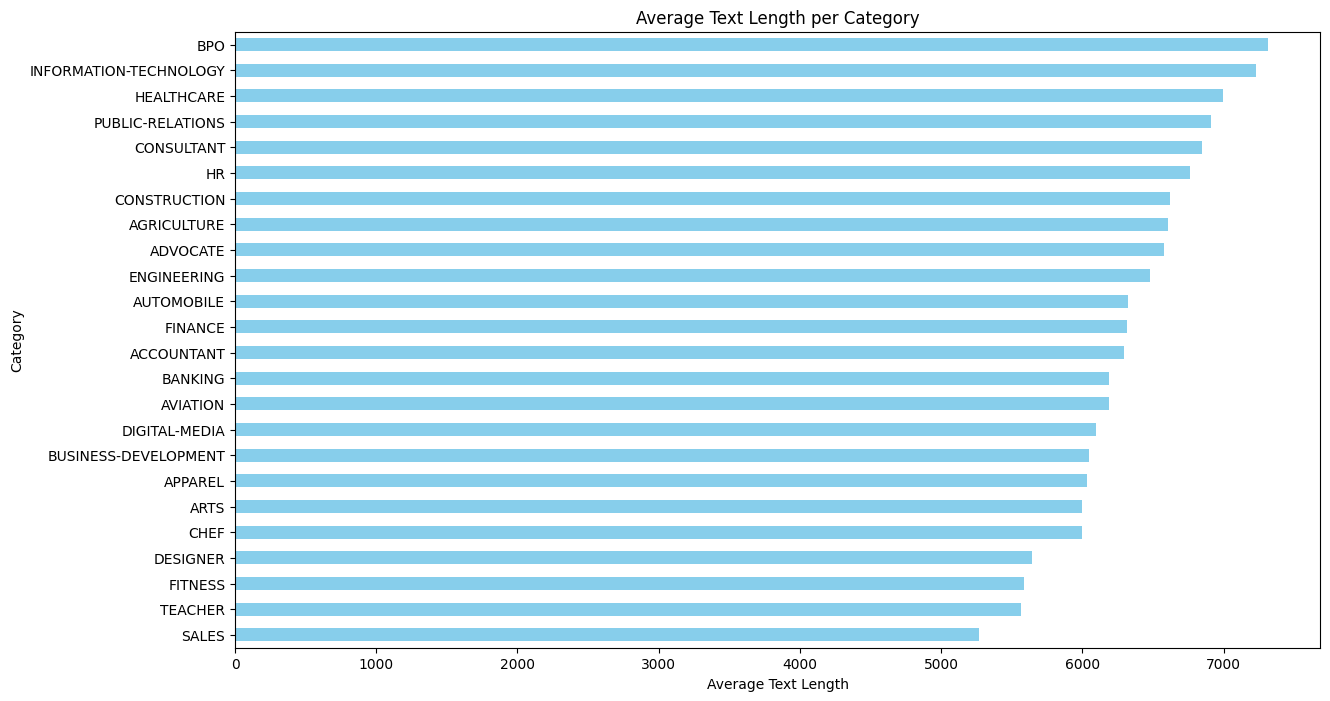

In [8]:
import matplotlib.pyplot as plt

# Calculate the average text length for each category
avg_text_length_per_category = data_cleaned.groupby('Category')['Text_Length'].mean().sort_values()

# Visualize the average text length for each category
plt.figure(figsize=(14, 8))
avg_text_length_per_category.plot(kind='barh', color='skyblue')
plt.title('Average Text Length per Category')
plt.xlabel('Average Text Length')
plt.ylabel('Category')
plt.show()



In [9]:
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
nltk.download('stopwords')



# Initialize stemmer
stemmer = PorterStemmer()
stop_words = set(stopwords.words('english'))

# Function to preprocess each resume
def preprocess_text(text):
    # Remove HTML tags
    text = re.sub(r'<.*?>', ' ', text)
    # Remove non-alphabetical characters
    text = re.sub(r'[^a-zA-Z]', ' ', text)
    # Convert to lowercase
    text = text.lower()
    # Tokenize text
    words = text.split()
    # Remove stop words and apply stemming
    words = [stemmer.stem(word) for word in words if word not in stop_words]
    # Join words back to a single string
    return ' '.join(words)

# Apply the preprocessing function to the 'Resume_str' column
data_cleaned['Resume_str_cleaned'] = data_cleaned['Resume_str'].apply(preprocess_text)

# Initialize TF-IDF Vectorizer
tfidf = TfidfVectorizer(max_features=5000)  # Limiting to 5000 features for simplicity

# Fit and transform the cleaned text data
X = tfidf.fit_transform(data_cleaned['Resume_str_cleaned'])

# Extract the labels
y = data_cleaned['Category']

[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [10]:
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import pandas as pd

X = tfidf.fit_transform(data_cleaned['Resume_str_cleaned'])
y = data_cleaned['Category']

# Split the data into training and test sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the model (SVM)
model = LinearSVC()

# Train the model
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

# Print evaluation results
print(f"Accuracy: {accuracy:.2f}")
print("\nClassification Report:\n", report)
print("\nConfusion Matrix:\n", conf_matrix)

Accuracy: 0.65

Classification Report:
                         precision    recall  f1-score   support

            ACCOUNTANT       0.68      0.86      0.76        29
              ADVOCATE       0.60      0.70      0.65        30
           AGRICULTURE       0.25      0.12      0.17         8
               APPAREL       0.55      0.55      0.55        20
                  ARTS       0.50      0.22      0.31        18
            AUTOMOBILE       0.67      0.33      0.44         6
              AVIATION       0.78      0.86      0.82        21
               BANKING       0.76      0.70      0.73        23
                   BPO       0.00      0.00      0.00         2
  BUSINESS-DEVELOPMENT       0.75      0.44      0.56        27
                  CHEF       0.89      0.71      0.79        24
          CONSTRUCTION       0.83      0.85      0.84        34
            CONSULTANT       0.42      0.25      0.31        20
              DESIGNER       0.70      0.74      0.72        19

In [11]:
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix


# Convert labels to numerical format using LabelEncoder
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(data_cleaned['Category'])

# Convert the text data to TF-IDF vectors
X = tfidf.fit_transform(data_cleaned['Resume_str_cleaned']).toarray()

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the ANN model architecture
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(512, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dropout(0.5),  # Adding dropout for regularization
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(len(label_encoder.classes_), activation='softmax')  # Output layer
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2, verbose=2)

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=2)
print(f"Test Accuracy: {test_accuracy:.2f}")

# Predict on the test data
y_pred = model.predict(X_test)
y_pred_classes = y_pred.argmax(axis=1)

# Generate classification report
report = classification_report(y_test, y_pred_classes, target_names=label_encoder.classes_)
conf_matrix = confusion_matrix(y_test, y_pred_classes)

print("\nClassification Report:\n", report)
print("\nConfusion Matrix:\n", conf_matrix)

2024-08-20 09:36:02.842172: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-08-20 09:36:02.842327: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-08-20 09:36:03.017879: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10


I0000 00:00:1724146582.039782      77 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.
W0000 00:00:1724146582.060590      77 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1724146587.322982      75 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1724146587.833586      77 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


50/50 - 12s - 234ms/step - accuracy: 0.1189 - loss: 3.0935 - val_accuracy: 0.2261 - val_loss: 2.8497
Epoch 2/10
50/50 - 0s - 4ms/step - accuracy: 0.3694 - loss: 2.3943 - val_accuracy: 0.4849 - val_loss: 1.9371


W0000 00:00:1724146588.341619      75 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


Epoch 3/10
50/50 - 0s - 4ms/step - accuracy: 0.5595 - loss: 1.5609 - val_accuracy: 0.5276 - val_loss: 1.6457
Epoch 4/10
50/50 - 0s - 4ms/step - accuracy: 0.7288 - loss: 1.0316 - val_accuracy: 0.5578 - val_loss: 1.5829
Epoch 5/10
50/50 - 0s - 4ms/step - accuracy: 0.8351 - loss: 0.6446 - val_accuracy: 0.5930 - val_loss: 1.5493
Epoch 6/10
50/50 - 0s - 4ms/step - accuracy: 0.9100 - loss: 0.3711 - val_accuracy: 0.5678 - val_loss: 1.6911
Epoch 7/10
50/50 - 0s - 4ms/step - accuracy: 0.9446 - loss: 0.2296 - val_accuracy: 0.5955 - val_loss: 1.7048
Epoch 8/10
50/50 - 0s - 4ms/step - accuracy: 0.9685 - loss: 0.1465 - val_accuracy: 0.5955 - val_loss: 1.8575
Epoch 9/10
50/50 - 0s - 4ms/step - accuracy: 0.9805 - loss: 0.1024 - val_accuracy: 0.5879 - val_loss: 1.9373
Epoch 10/10
50/50 - 0s - 4ms/step - accuracy: 0.9924 - loss: 0.0631 - val_accuracy: 0.5779 - val_loss: 1.9717
16/16 - 1s - 31ms/step - accuracy: 0.5815 - loss: 1.9676


W0000 00:00:1724146590.589900      76 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


Test Accuracy: 0.58
 1/16 ━━━━━━━━━━━━━━━━━━━━ 3s 241ms/step

W0000 00:00:1724146590.881804      76 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step

Classification Report:
                         precision    recall  f1-score   support

            ACCOUNTANT       0.71      0.76      0.73        29
              ADVOCATE       0.72      0.43      0.54        30
           AGRICULTURE       0.20      0.25      0.22         8
               APPAREL       0.53      0.40      0.46        20
                  ARTS       0.36      0.22      0.28        18
            AUTOMOBILE       0.24      0.67      0.35         6
              AVIATION       0.85      0.81      0.83        21
               BANKING       0.79      0.65      0.71        23
                   BPO       0.00      0.00      0.00         2
  BUSINESS-DEVELOPMENT       0.60      0.56      0.58        27
                  CHEF       1.00      0.62      0.77        24
          CONSTRUCTION       0.85      0.82      0.84        34
            CONSULTANT       0.12      0.15      0.13        20
              DESIGNER       0.76     

W0000 00:00:1724146591.135737      75 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


In [12]:
!pip install transformers datasets torch


/opt/conda/lib/python3.10/pty.py:89: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid, fd = os.forkpty()


In [13]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.preprocessing import LabelEncoder

# Load the preprocessed data

# Convert labels to numerical format using LabelEncoder
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(data_cleaned['Category'])

# Convert the text data to TF-IDF vectors
tfidf = TfidfVectorizer(max_features=5000)  # Limiting to 5000 features for simplicity
X = tfidf.fit_transform(data_cleaned['Resume_str_cleaned'])

# Split the data into training and test sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Logistic Regression model
model = LogisticRegression(max_iter=10000)

# Train the model
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred, target_names=label_encoder.classes_)
conf_matrix = confusion_matrix(y_test, y_pred)

# Print evaluation results
print(f"Accuracy: {accuracy:.2f}")
print("\nClassification Report:\n", report)
print("\nConfusion Matrix:\n", conf_matrix)

Accuracy: 0.63

Classification Report:
                         precision    recall  f1-score   support

            ACCOUNTANT       0.81      0.86      0.83        29
              ADVOCATE       0.53      0.57      0.55        30
           AGRICULTURE       1.00      0.12      0.22         8
               APPAREL       0.50      0.45      0.47        20
                  ARTS       0.12      0.11      0.12        18
            AUTOMOBILE       1.00      0.17      0.29         6
              AVIATION       0.67      0.86      0.75        21
               BANKING       0.80      0.70      0.74        23
                   BPO       0.00      0.00      0.00         2
  BUSINESS-DEVELOPMENT       0.78      0.52      0.62        27
                  CHEF       0.85      0.71      0.77        24
          CONSTRUCTION       0.89      0.71      0.79        34
            CONSULTANT       0.50      0.30      0.37        20
              DESIGNER       0.75      0.79      0.77        19

/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [14]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

# Increase TF-IDF features and include bigrams
tfidf = TfidfVectorizer(max_features=10000, ngram_range=(1, 2))

# Transform the text data
X = tfidf.fit_transform(data_cleaned['Resume_str_cleaned'])

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and tune SVM using GridSearchCV
param_grid = {'C': [0.1, 1, 10, 100], 'kernel': ['linear', 'rbf'], 'gamma': ['scale', 'auto']}
grid = GridSearchCV(SVC(), param_grid, refit=True, verbose=2)
grid.fit(X_train, y_train)

# Best parameters found
print(f"Best Parameters: {grid.best_params_}")

# Predict on the test set
y_pred = grid.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred, target_names=label_encoder.classes_)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print("\nClassification Report:\n", report)
print("\nConfusion Matrix:\n", conf_matrix)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV] END ..................C=0.1, gamma=scale, kernel=linear; total time=  16.4s
[CV] END ..................C=0.1, gamma=scale, kernel=linear; total time=  16.4s
[CV] END ..................C=0.1, gamma=scale, kernel=linear; total time=  16.5s
[CV] END ..................C=0.1, gamma=scale, kernel=linear; total time=  16.4s
[CV] END ..................C=0.1, gamma=scale, kernel=linear; total time=  16.6s
[CV] END .....................C=0.1, gamma=scale, kernel=rbf; total time=  17.6s
[CV] END .....................C=0.1, gamma=scale, kernel=rbf; total time=  17.6s
[CV] END .....................C=0.1, gamma=scale, kernel=rbf; total time=  17.6s
[CV] END .....................C=0.1, gamma=scale, kernel=rbf; total time=  17.6s
[CV] END .....................C=0.1, gamma=scale, kernel=rbf; total time=  17.6s
[CV] END ...................C=0.1, gamma=auto, kernel=linear; total time=  16.3s
[CV] END ...................C=0.1, gamma=auto, k

In [15]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

# Load the preprocessed data
# Convert labels to numerical format using LabelEncoder
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(data_cleaned['Category'])

# Convert the text data to TF-IDF vectors
tfidf = TfidfVectorizer(max_features=10000, ngram_range=(1, 2))
X = tfidf.fit_transform(data_cleaned['Resume_str_cleaned'])

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the base models
log_clf = LogisticRegression(max_iter=1000)
svc_clf = SVC(kernel='linear', probability=True)  # Set probability=True for VotingClassifier
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
nb_clf = MultinomialNB()
gb_clf = GradientBoostingClassifier(n_estimators=100, random_state=42)

# Initialize the Voting Classifier with five models
voting_clf = VotingClassifier(
    estimators=[('lr', log_clf), ('svc', svc_clf), ('rf', rf_clf), ('nb', nb_clf), ('gb', gb_clf)],
    voting='soft'  # Use 'soft' voting to account for predicted probabilities
)

# Train the ensemble model
voting_clf.fit(X_train, y_train)

# Predict on the test set
y_pred = voting_clf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred, target_names=label_encoder.classes_)
conf_matrix = confusion_matrix(y_test, y_pred)

# Print evaluation results
print(f"Accuracy: {accuracy:.2f}")
print("\nClassification Report:\n", report)
print("\nConfusion Matrix:\n", conf_matrix)


Accuracy: 0.77

Classification Report:
                         precision    recall  f1-score   support

            ACCOUNTANT       0.76      0.90      0.83        29
              ADVOCATE       0.77      0.80      0.79        30
           AGRICULTURE       0.80      0.50      0.62         8
               APPAREL       0.85      0.55      0.67        20
                  ARTS       0.60      0.50      0.55        18
            AUTOMOBILE       0.60      0.50      0.55         6
              AVIATION       0.90      0.90      0.90        21
               BANKING       0.75      0.65      0.70        23
                   BPO       0.50      0.50      0.50         2
  BUSINESS-DEVELOPMENT       1.00      0.85      0.92        27
                  CHEF       0.86      0.79      0.83        24
          CONSTRUCTION       0.94      0.88      0.91        34
            CONSULTANT       0.83      0.50      0.62        20
              DESIGNER       0.76      0.84      0.80        19

In [16]:
resume_data.info()

NameError: name 'resume_data' is not defined